In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace = True)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Feature Engineering

In [11]:
df['YearsPerCompany'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)
df['IncomePerYear'] = df['MonthlyIncome'] * 12
df['SalaryHikePercent'] = df['PercentSalaryHike'] / 100
df['WorkLifeBalanceScore'] = df['WorkLifeBalance'] * df['JobSatisfaction']

In [12]:
cat_cols = df.select_dtypes(include = 'object')

In [13]:
le = LabelEncoder()

In [14]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsPerCompany,IncomePerYear,SalaryHikePercent,WorkLifeBalanceScore
0,41,1,2,1102,2,1,2,1,2,0,...,0,1,6,4,0,5,0.888889,71916,0.11,4
1,49,0,1,279,1,8,1,1,3,1,...,3,3,10,7,1,7,5.000000,61560,0.23,6
2,37,1,2,1373,1,2,2,4,4,1,...,3,3,0,0,0,0,1.000000,25080,0.15,9
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,8,7,3,0,4.000000,34908,0.11,9
4,27,0,2,591,1,2,1,3,1,1,...,3,3,2,2,2,2,0.600000,41616,0.12,6


In [16]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [18]:
scaler = StandardScaler()

In [19]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test_scaled)
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       370
           1       0.68      0.38      0.49        71

    accuracy                           0.87       441
   macro avg       0.78      0.67      0.71       441
weighted avg       0.86      0.87      0.86       441


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.78      0.10      0.17        71

    accuracy                           0.85       441
   macro avg       0.81      0.55      0.55       441
weighted avg       0.84      0.85      0.80       441


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.83      0.14      0.24        71

    accuracy                           0.86       441

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.870748,0.675000,0.380282,0.486486,0.829654
Random Forest,0.850340,0.777778,0.098592,0.175000,0.819414
Support Vector Machine,0.857143,0.833333,0.140845,0.240964,0.819909
Gradient Boosting,0.863946,0.703704,0.267606,0.387755,0.821317
XGBoost,0.845805,0.538462,0.295775,0.381818,0.792120


In [21]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Perform grid search
grid_search.fit(x_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("\nBest Parameters:", best_params)

# Evaluate best model
y_pred = best_rf.predict(x_test)
y_prob = best_rf.predict_proba(x_test)[:, 1]

print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Update results
results_df.loc['Random Forest (Tuned)'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_prob)
}

print("\nUpdated Model Performance Comparison:")
display(results_df)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.71      0.17      0.27        71

    accuracy                           0.85       441
   macro avg       0.78      0.58      0.60       441
weighted avg       0.84      0.85      0.82       441


Updated Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.870748,0.675000,0.380282,0.486486,0.829654
Random Forest,0.850340,0.777778,0.098592,0.175000,0.819414
Support Vector Machine,0.857143,0.833333,0.140845,0.240964,0.819909
Gradient Boosting,0.863946,0.703704,0.267606,0.387755,0.821317
XGBoost,0.845805,0.538462,0.295775,0.381818,0.792120
Random Forest (Tuned),0.854875,0.705882,0.169014,0.272727,0.789836


# Feature Importance

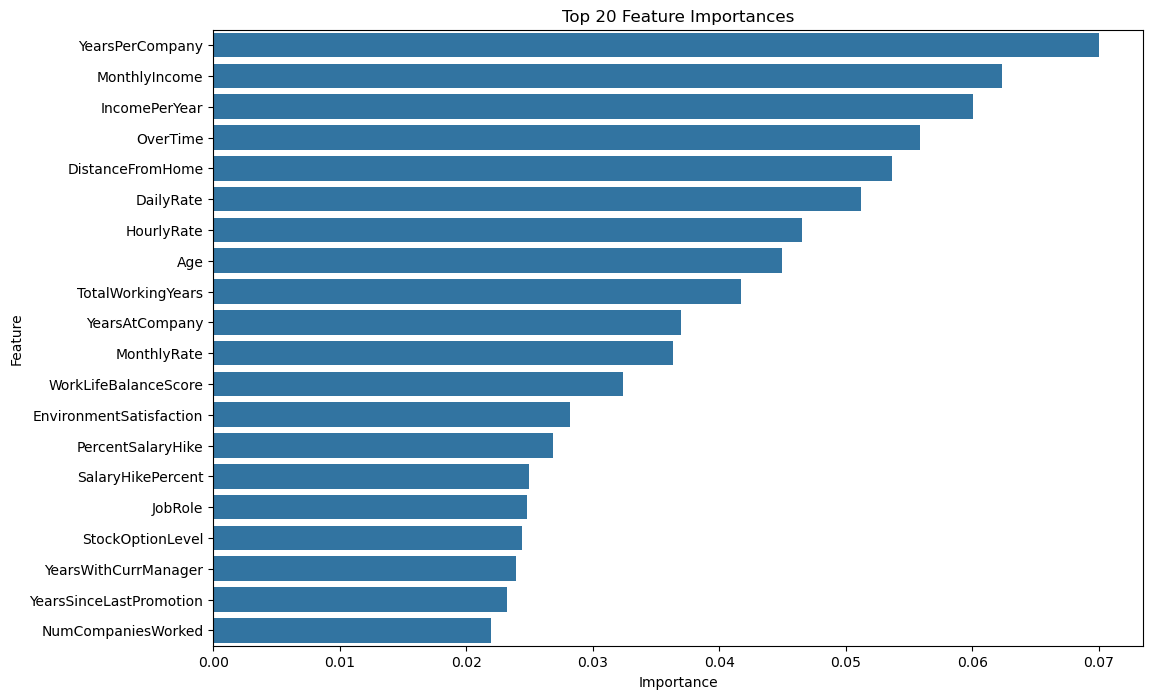

In [23]:
feature_importances = best_rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

# Confusion Matrix

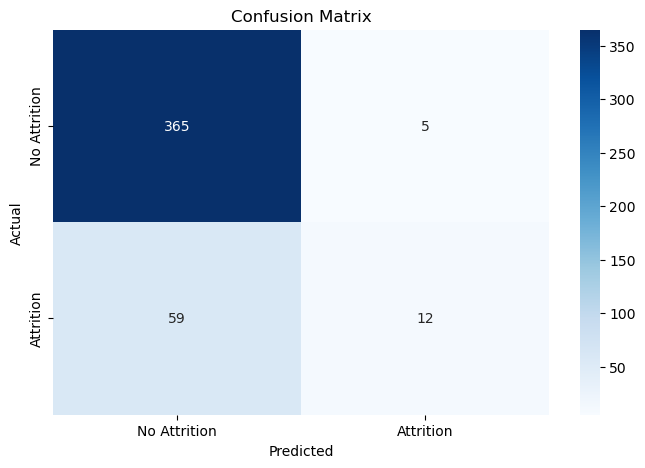

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Attrition', 'Attrition'], 
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
importance_df.to_csv('feature_importance.csv', index=False)

In [53]:
df1 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [55]:
df1.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace = True)

In [57]:
df1['YearsPerCompany'] = df1['TotalWorkingYears'] / (df1['NumCompaniesWorked'] + 1)
df1['IncomePerYear'] = df1['MonthlyIncome'] * 12
df1['SalaryHikePercent'] = df1['PercentSalaryHike'] / 100
df1['WorkLifeBalanceScore'] = df1['WorkLifeBalance'] * df1['JobSatisfaction']

In [61]:
df1.to_csv('cleaned_dataset.csv', index = False)